# Preprocessing & Augmentation Visualization

This notebook contains an example of how we preprocessed and augmented slices during training. While training, each slice was preprocessed, and there was a 50% chance that an image would be flipped horizontally (i.e. left to right) and a 50% chance that the image would be slightly randomly rotated (between -10 and 10 degrees).

##### Imports

In [1]:
# Packages
import pandas as pd
import os
import sys
import torch
import matplotlib.pyplot as plt

In [2]:
# Local imports
sys.path.append(".")
sys.path.append("..")
from visualisation.slice_plotter import plot_slice_by_acquisition

##### Loading Data

In [3]:
DATA_DIR = "D:/data/train"

In [4]:
label_df = pd.read_csv(os.path.join(DATA_DIR, "labels_slices.csv"), names=["patient_nr", "slice_nr", "class"])
label_df.head()

,patient_nr,slice_nr,class
0,1016,0,True
1,1016,1,True
2,1016,2,True
3,1016,3,True
4,1016,4,True


### Plotting Original, Preprocessed and Augmented Images

torch.Size([3, 512, 512])


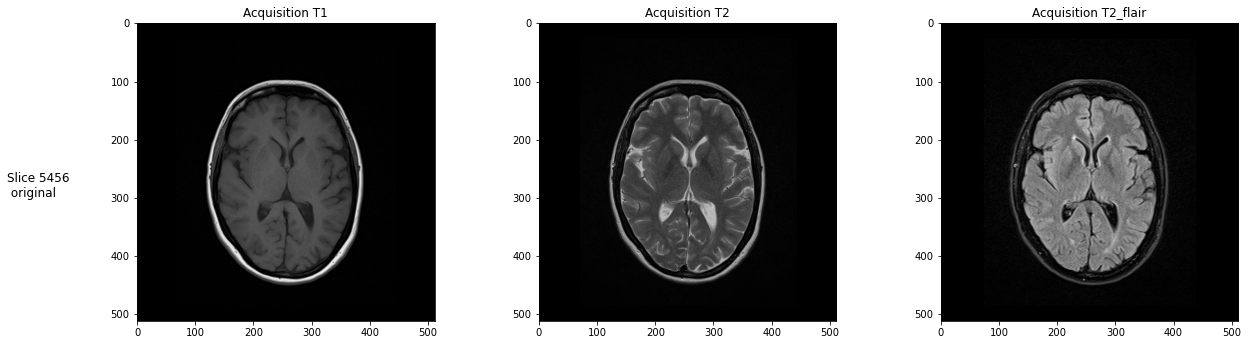

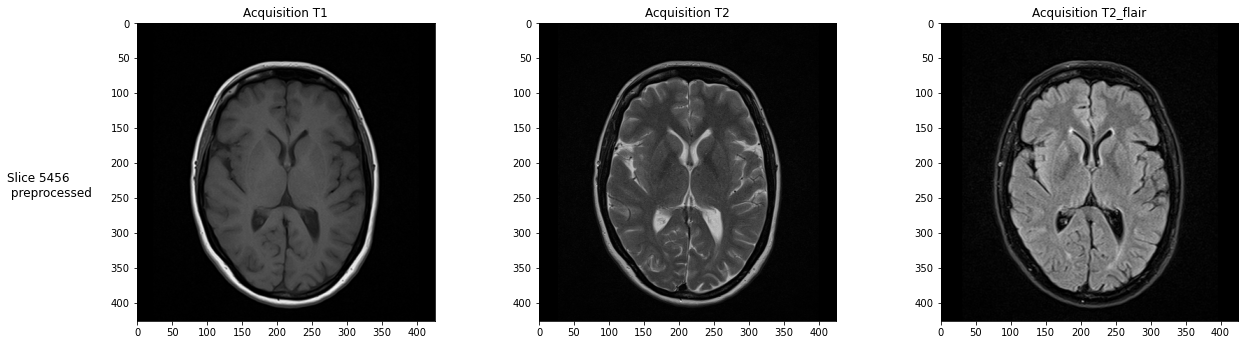

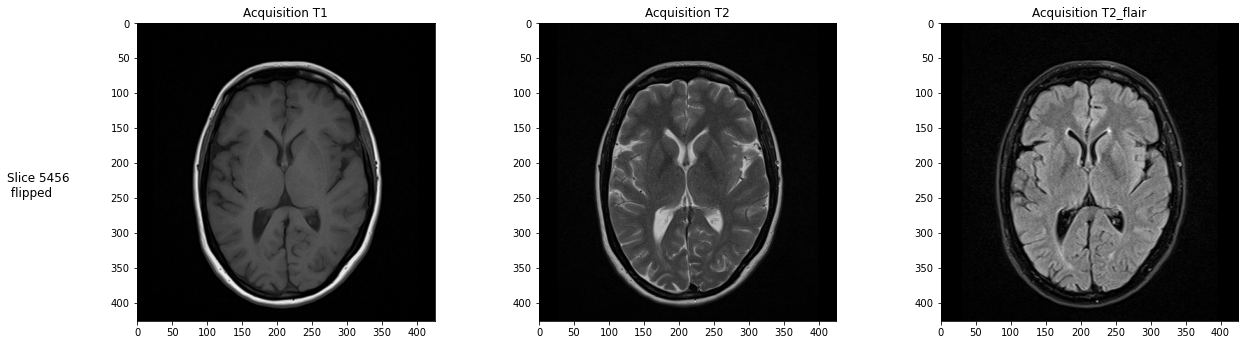

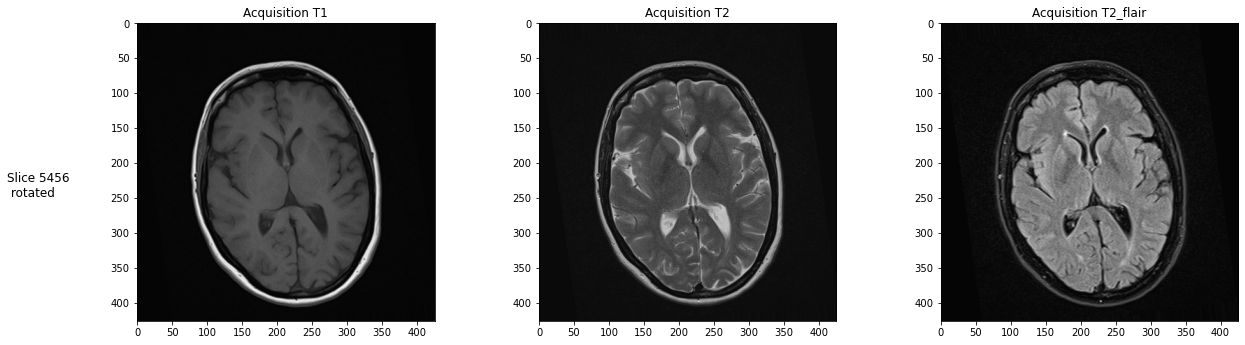

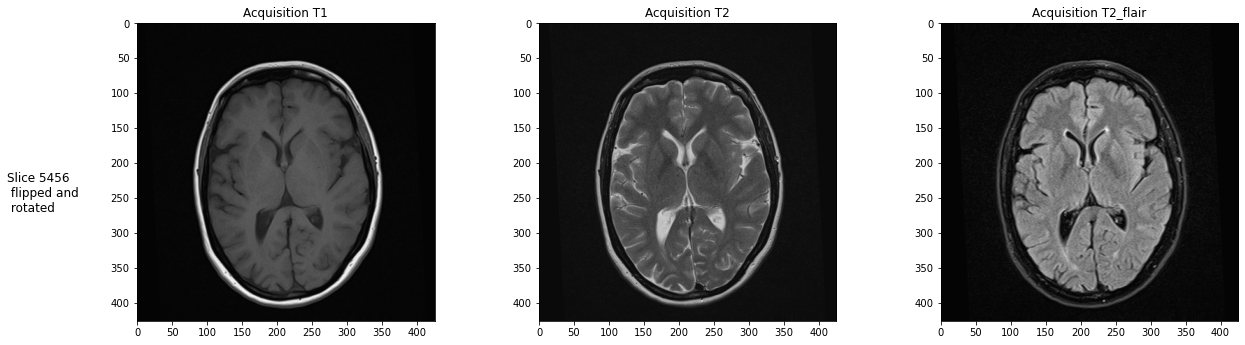

In [5]:
EXAMPLE_INDEX = 5456

row = label_df.loc[EXAMPLE_INDEX]
X = torch.load(f"{DATA_DIR}/{row['patient_nr']}_{row['slice_nr']}.pt")

print(X.shape)

from dataset.preprocessing import preprocess, augment

X_preproc = preprocess(X)
X_flip = augment(X_preproc, 1, 0)
X_rotate = augment(X_preproc, 0, 1)
X_flip_rotate = augment(X_flip, 0, 1)

plot_slice_by_acquisition(X, f"{EXAMPLE_INDEX}\n original")
plot_slice_by_acquisition(X_preproc, f"{EXAMPLE_INDEX}\n preprocessed")
plot_slice_by_acquisition(X_flip, f"{EXAMPLE_INDEX}\n flipped")
plot_slice_by_acquisition(X_rotate, f"{EXAMPLE_INDEX}\n rotated")
plot_slice_by_acquisition(X_flip_rotate, f"{EXAMPLE_INDEX}\n flipped and\n rotated")           